In [2]:
import pandas as pd
import numpy as np 
from sklearn import tree

titanic=pd.read_csv('../data/train_and_test2.csv')

titanic.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
X = titanic.drop(['Passengerid','2urvived'], axis=1)
Y = titanic['2urvived']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [5]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: 2urvived, dtype: int64

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Crea un clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Entrena el modelo con los datos de entrenamiento
clf.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

[Text(0.4149948559670782, 0.9821428571428571, 'x[2] <= 0.5\ngini = 0.38\nsamples = 916\nvalue = [682, 234]'),
 Text(0.12551440329218108, 0.9464285714285714, 'x[0] <= 12.5\ngini = 0.233\nsamples = 593\nvalue = [515, 78]'),
 Text(0.07818930041152264, 0.9107142857142857, 'x[20] <= 2.5\ngini = 0.493\nsamples = 34\nvalue = [19, 15]'),
 Text(0.05761316872427984, 0.875, 'x[0] <= 5.0\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.04938271604938271, 0.8392857142857143, 'x[1] <= 24.5\ngini = 0.298\nsamples = 9\nvalue = [1, 8]'),
 Text(0.0411522633744856, 0.8035714285714286, 'x[1] <= 20.875\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.03292181069958848, 0.7678571428571429, 'gini = 0.444\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04938271604938271, 0.7678571428571429, 'gini = nan\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05761316872427984, 0.8035714285714286, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.06584362139917696, 0.8392857142857143, 'gini = 0.0\nsamples = 3\nvalue = [2,

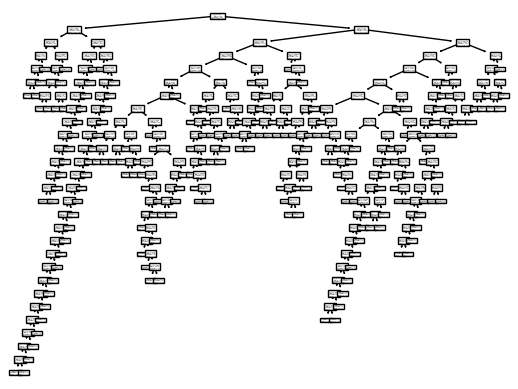

In [7]:
tree.plot_tree(clf)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Realiza predicciones en el conjunto de prueba
Y_pred = clf.predict(X_test)

# Crea una variable que indica si las personas morían (1) o sobrevivían (0) según las predicciones
predictions = (Y_pred == 1).astype(int)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions)

# Calcula métricas
accuracy = accuracy_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

# Muestra la matriz de confusión y las métricas
print("Matriz de Confusión:")
print(conf_matrix)
print("Precisión:", accuracy)
print("Precisión (Positive Predictive Value):", precision)
print("Sensibilidad (Recall):", recall)


Matriz de Confusión:
[[252  33]
 [ 66  42]]
Precisión: 0.7480916030534351
Precisión (Positive Predictive Value): 0.56
Sensibilidad (Recall): 0.3888888888888889
